# CAT AND DOG CLASSIFICATION

4000 Images(2000 cats,2000 Dogs)


2000 images = Train (class_a :1000 images , class_b : 1000 images)


1000 images = Valid (class_a :500 images , class_b : 500 images)


1000 images = Test 

class_a = cat, class_b=dog

# PROCESS

1. CNN with small dataset(acc 71%)
2. CNN with data augmentation(acc 80+%)
3. Transfer learning(acc 90+&)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
import tensorflow as tf
from tensorflow import keras

C:\Users\User\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
train_dir=r'C:\Users\User\Downloads\cats_and_dogs_small\train'
validation_dir=r'C:\Users\User\Downloads\cats_and_dogs_small\validation'
test_dir=r'C:\Users\User\Downloads\cats_and_dogs_small\test'

# Data Preprocessing

1. Read the picture file
2. Decode the JPEG content to RGB grids of pixels
3. Convert this into floating point tensors
4. Rescale the pixel values(between 0 to 255) to the [0,1] interval

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
#Generating batches of tensor image data
train_datagen=ImageDataGenerator(rescale=1./255)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
         train_dir,
         target_size=(150,150),
        batch_size=20,
        class_mode='binary')
validation_generator=test_datagen.flow_from_directory(
         validation_dir,
         target_size=(150,150),
        batch_size=20,
        class_mode='binary')


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [12]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [19]:
model=models.Sequential()

model.add(layers.Conv2D(32,(3,3),activation='relu',
                        input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
        
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
          
model.add(layers.Flatten())
          
model.add(layers.Dense(512,activation='relu'))
          
model.add(layers.Dense(1,activation='sigmoid'))
          

The number of features are increading as we go along on our network and the length of forward images are decreasing by maxpooling

This is the standard practise. Image size should decrease with each one layer and the feature map height should increase as you go along the network.

In [20]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [22]:
from tensorflow.keras import optimizers

model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(learning_rate=1e-4),metrics=['acc'])

In [28]:
history=model.fit_generator(
     train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50)

Epoch 1/20


C:\Users\User\AppData\Local\Temp\ipykernel_20240\3200035309.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history=model.fit_generator(


100/100 [==============================] - 42s 418ms/step - loss: 0.2642 - acc: 0.8975 - val_loss: 0.5879 - val_acc: 0.7380
Epoch 2/20
100/100 [==============================] - 42s 420ms/step - loss: 0.2384 - acc: 0.9060 - val_loss: 0.5968 - val_acc: 0.7470
Epoch 3/20
100/100 [==============================] - 42s 420ms/step - loss: 0.2228 - acc: 0.9185 - val_loss: 0.6626 - val_acc: 0.7230
Epoch 4/20
100/100 [==============================] - 43s 432ms/step - loss: 0.2071 - acc: 0.9195 - val_loss: 0.5682 - val_acc: 0.7630
Epoch 5/20
100/100 [==============================] - 41s 410ms/step - loss: 0.1904 - acc: 0.9285 - val_loss: 0.5860 - val_acc: 0.7450
Epoch 6/20
100/100 [==============================] - 42s 416ms/step - loss: 0.1813 - acc: 0.9390 - val_loss: 0.6300 - val_acc: 0.7410
Epoch 7/20
100/100 [==============================] - 41s 407ms/step - loss: 0.1548 - acc: 0.9500 - val_loss: 0.7077 - val_acc: 0.7280
Epoch 8/20
100/100 [==============================] - 41s 413ms/st

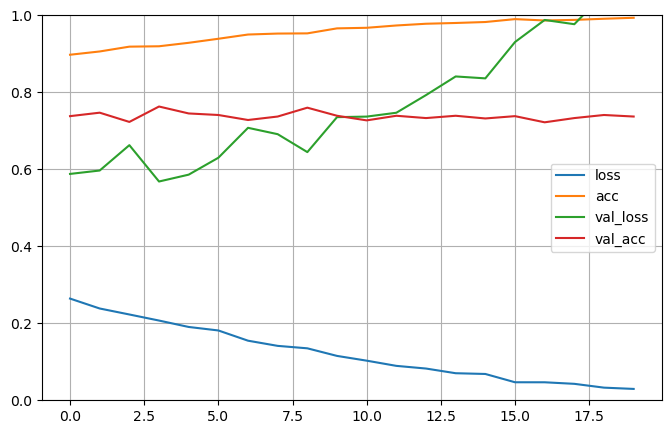

In [30]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()


In [31]:
model.save("model.h5")


In [33]:
from tensorflow.keras import backend as k
k.clear_session()
del model

NameError: name 'model' is not defined